# Feature Extraction from Speech Data with OpenSMILE and GeMaps config
## Audio data collected in the EEG MIST paradigm

In [2]:
import subprocess
import time
from pathlib import Path
from typing import List, Union

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [8]:
# Set Data Path
# DATA_PATH = "C:/Users/mitch/OneDrive - UGent/UGent/Projects/5. VOP project/Voice_and_App/"
BASE_PATH = "D:/Data/EEG_Study_1/" # Go check 1_audio_preprocess.py
# BASE_PATH = "Z:/ghepmk_data/2020_EEGStudy1/"
#     DATA_PATH = BASE_PATH + "aligned_data"
# BASE_PATH = "/users/jonvdrdo/jonas/data/aaa_contextaware/raw/uz_study/"
DATA_PATH = BASE_PATH + "aligned_data"
# Set OpenSMILE Config Path
# OPENSMILE_CONFIG = '"C:/Users/mitch/OneDrive - UGent/UGent/Topics/Facial/OpenSmile/opensmile-2.3.0/config/gemaps/GeMAPSv01a.conf"'

FEATURES_PATH = ''  # + "/features_gemaps/"
# RAW_PATH = "C:/Users/mitch/OneDrive - UGent/UGent/Projects/2. Vanhollebeke et al/Data/Actual/Audio_Jonas"

# Extract features

## THIS ONE IS IF GETTING DATA FROM ALIGNED_DATA

In [3]:
# Only run this cell ONCE (set to False if exctracted)

# THIS ONE IS IF GETTING DATA FROM ALIGNED_DATA
# if False:
#     # Create paths if not existed
#     Path(FEATURES_PATH).mkdir(parents=True, exist_ok=True)
#
#
#     def extract(source, destination):
#         # Generate extraction command
#         cmd = "C:/Users/mitch/OneDrive/Documents/UGent/Topics/Facial/OpenSmile/opensmile-2.3.0/SMILExtract_Release -C {} -I {} -O {}".format(
#             OPENSMILE_CONFIG, source, destination
#         )
#         #     print(cmd)
#         p = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True)
#         p.wait()
#
#
#     for wav_file in tqdm(glob.glob(DATA_PATH + "/*/audio/*.wav")):
#         participant_dir = wav_file.split("/")[-1]
#         participant_dir = participant_dir.split("\\")[1]
#         filename = re.findall(r"udio\\(.+).wav", wav_file)[
#             0
#         ]  # file name excluding .wav
#         #         filenum = re.findall(r'occ_(.+?).wav',wav_file)[0] # file number
#         filenum = filename[
#                   filename.find("occ_") + 4: filename.find("occ_") + 6
#                   ]  # else it cant find exceptions like 99-2 or something
#
#         if (
#                 filenum == "99"
#         ):  # Something went wrong in the naming of the inital files and this is a quick fix
#             filename = (
#                     filename[: filename.find("occ_") + 4]
#                     + "9"
#                     + filename[filename.find("occ_") + 6:]
#             )  # replace 99 by 9 but keep the rest
#
#         out_path = FEATURES_PATH + "/" + participant_dir + "/" + filename + ".arff"
#
#         wav_file = '"' + wav_file.replace(os.sep, "/") + '"'
#         out_path = '"' + out_path + '"'
#
#         Path(FEATURES_PATH + "/" + participant_dir + "/").mkdir(
#             parents=True, exist_ok=True
#         )
#
#         extract(wav_file, out_path)
#         break
#     print(out_path)

## THIS ONE IS IF GETTING DATA FROM LOCAL JONAS_DATA

In [4]:
# Only run this cell ONCE (set to False if exctracted)
# count = 0
# THIS ONE IS IF GETTING DATA FROM LOCAL DATA
# if False:
#     # Create paths if not existed
#     Path(FEATURES_PATH).mkdir(parents=True, exist_ok=True)
#
#
#     def extract(source, destination):
#         # Generate extraction command
#         cmd = "C:/Users/mitch/OneDrive/Documents/UGent/Topics/Facial/OpenSmile/opensmile-2.3.0/SMILExtract_Release -C {} -I {} -O {}".format(
#             OPENSMILE_CONFIG, source, destination
#         )
#         #     print(cmd)
#         p = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True)
#         p.wait()
#
#
#     for wav_file in tqdm(glob.glob(RAW_PATH + "/*/sentences*.wav")):
#         participant_dir = re.findall(r"Jonas\\(.+?)\\sentences", wav_file)[0]
#         filenum = re.findall(r"occ_(.+?).wav", wav_file)[0]
#
#         if (
#                 filenum == "99"
#         ):  # Something went wrong in the naming of the inital files and this is a quick fix
#             filename = "sentences_occ_" + "9"
#         else:
#             filename = "sentences_occ_" + filenum
#
#         out_path = FEATURES_PATH + "/" + participant_dir + "/" + filename + ".arff"
#
#         wav_file = '"' + wav_file.replace(os.sep, "/") + '"'
#         out_path = '"' + out_path + '"'
#
#         Path(FEATURES_PATH + "/" + participant_dir + "/").mkdir(
#             parents=True, exist_ok=True
#         )
#
#         extract(wav_file, out_path)
#         print(f'in file is: ', wav_file, ' and out file is: ', out_path)
#         break
#     print(out_path)

# Load all Marloeses and compile into comprehensive df

In [ ]:
# if False:  # Only used once to get everything into a nice .csv
#     from arff2pandas import a2p
#
#     dataMarloes = pd.DataFrame()
#     for arff_file in tqdm(glob.glob(FEATURES_PATH + "/*/sentences*.arff")):
#         participantNum = int(
#             re.findall(r"features_gemaps\\(.+?)\\sentences", arff_file)[0]
#         )
#         try:
#             fileNum = int(re.findall(r"sentences_occ_(.+?).arff", arff_file)[0])
#
#             with open(arff_file) as f:
#                 df = a2p.load(f)
#                 df.insert(
#                     0, "participantNum", participantNum
#                 )  # Add column for participant Number
#                 df.insert(1, "fileNum", fileNum)  # Add column for file Number
#                 dataMarloes = dataMarloes.append(df)
#         except:
#             print(
#                 f"Something wrong with file name of participant: ",
#                 participantNum,
#                 "File number: ",
#                 fileNum + 1,
#             )
#
#     dataMarloes.to_csv(
#         FEATURES_PATH + "marloesFeaturesCompiled.csv", encoding="utf-8", index=False
#     )

dataMarloes = pd.read_csv(
    FEATURES_PATH + "marloesFeaturesCompiled.csv"
)  # Read .csv file

dataMarloes = dataMarloes[
    dataMarloes["fileNum"] != 9
    ]  # For now remove every first Marloes from the dataframe - we seem not to have any SAMs for these.

# Rename column names because with the .arff files it got loaded weirdly
maxX = len(dataMarloes.columns)
count = 0

while count < maxX:
    if count > 2:  # Skip a few
        name = dataMarloes.columns[count]
        name = name[
               0: name.find("@NUMERIC")
               ]  # Find where @NUMERIC starts and get everything in front of it
        dataMarloes.rename(
            columns={dataMarloes.columns[count]: name}, inplace=True
        )  # Rename columns
    count = count + 1

FileNotFoundError: [Errno 2] No such file or directory: 'marloesFeaturesCompiled.csv'

# Add explicit responses from appData.csv

In [6]:
# if False:  # Only used once to get everything into a nice .csv
#     dataSAM = pd.DataFrame()
#
#     for csv_file in tqdm(glob.glob(DATA_PATH + "/*/audio/appData.csv")):
#         participantNum = csv_file.split("/")[-1]
#         participantNum = int(participantNum.split("\\")[1])
#
#         temp = pd.read_csv(csv_file)
#         for i in range(0, 9):
#             d = {
#                 "participantNum": participantNum,
#                 "fileNum": i,
#                 "arousal": temp["arousals_" + str(i)],
#                 "valence": temp["valences_" + str(i)],
#                 "dominance": temp["dominances_" + str(i)],
#             }
#             df = pd.DataFrame(data=d)
#             dataSAM = dataSAM.append(df)
#
#     dataSAM.to_csv(
#         FEATURES_PATH + "SAMsCompiled.csv", encoding="utf-8", index=False
#     )  # Write CSV

dataSAM = pd.read_csv(FEATURES_PATH + "SAMsCompiled.csv")  # Read CSV

# Get Physiological Data

EDA

In [7]:
EDA_PATH = "EEG1_study_feat_stats"

# Get aligned markers / timestamps

In [88]:
# we construct the data again as we might remove/ subsample it in the next step
data = pd.merge(
    dataMarloes, dataSAM, on=["participantNum", "fileNum"]
)  # Put marloes and SAMS together for all complete sets

# ---- the (sub)block range lists
timeline_range_list = [  # sub-block data from timeline file
    # baseline
    # (1)
    # controle
    (2, "Controle1Slide", "ControleSAM", "control"),
    (3, "Controle2Slide", "ControleSAM3", "control"),
    (4, "Controle3Slide", "ControleSAM4", "control"),
    # stress
    (6, "Stress1Slide", "StressSAM", "stress"),
    (7, "Stress2Slide", "StressSAM1", "stress"),
    (8, "Stress3Slide", "StressSAM2", "stress"),
]

# sub-block data from marker file
marker_range_list = [(1, "Rest EEG start", "Rest EEG end", "baseline")]

# Add some new columns to `data` in which we will store features / relevant metadata
data[["HR", "HRV", "EDA", "SCR_RATE", "SCR_AMPL", "start_ts", "stop_ts"]] = np.nan

# A list in which we store the physiological data of each block (rest, control, stress)
physio_data_block = []
tmp_user_dict = {}


def add_to_block(block_name: str, feat_name: str, sig_data: Union[List, pd.Series]):
    # block = 'baseline', 'control', or 'stress'
    # feat_name = name of the feature
    # sig_data -> the corresponding da
    if block_name in tmp_user_dict.keys():
        if feat_name not in tmp_user_dict[block_name].keys():
            tmp_user_dict[block_name][feat_name] = []
        tmp_user_dict[block_name][feat_name].append(sig_data)
    else:
        tmp_user_dict[block_name] = {}
        tmp_user_dict[block_name][feat_name] = []
        tmp_user_dict[block_name][feat_name].append(sig_data)


def compute_feats_sub_block(
    start_ts: pd.Timestamp, stop_ts: pd.Timestamp, location: np.array, block_name: str
):
    # this method computes the features for each sub-block
    # the add_to_block -> method add the data to each block

    # add the start and end timestamp
    data.at[location, "start_ts"] = start_ts
    data.at[location, "stop_ts"] = stop_ts

    # Average the HR data (this is probably pretty wrong) for the full segment to get one datapoint
    HR = ecg_rate[start_ts:stop_ts]
    HR = (
        HR.reindex(
            pd.date_range(HR.index.min(), HR.index.max(), freq="1s"),
            method="nearest",
        )
        .interpolate()
        .dropna()
    )
    data.at[location, "HR"] = HR.mean()
    add_to_block(block_name, "HR", HR.copy())

    # TODO -> add hr slope?
    # ask Jens for formulae?

    # now contains the time-difference between consecutive heat-beats
    HRV = hrv_ms[start_ts:stop_ts].copy()
    # aggregate
    data.at[location, "HRV"] = HRV.std()
    add_to_block(block_name, "HRV", HRV.copy())

    EDA = df_eda.EDA_Processed[start_ts:stop_ts]
    data.at[location, "EDA"] = EDA.mean()
    add_to_block(block_name, "EDA", EDA.copy())

    # 4Hz - 60 seconds -> SCR_RATE = amount of SCR's per minute
    SCR_RATE = df_eda.SCR_Peaks_neurokit_reduced_acc[start_ts:stop_ts].mean() * 4 * 60
    data.at[location, "SCR_RATE"] = SCR_RATE
    add_to_block(
        block_name,
        "SCR_RATE",
        df_eda.SCR_Peaks_neurokit[start_ts:stop_ts].copy(),
    )

    SCR_AMPL = df_eda.SCR_Amplitude_reduced_acc[start_ts:stop_ts]
    SCR_AMPL = SCR_AMPL[SCR_AMPL > 0]
    if sum(SCR_AMPL.notna()):
        SCR_AMPL = np.quantile(SCR_AMPL, 0.9)
        # we normalize the amplitude w.r.t. the EDA signal its value
        SCR_AMPL /= 1 + np.sqrt(EDA.mean())
    else:
        # print("SCR_AMPL is 0")
        SCR_AMPL = 0
    data.at[location, "SCR_AMPL"] = SCR_AMPL
    add_to_block(
        block_name,
        "SCR_AMPL",
        df_eda.SCR_Amplitude_reduced_acc[start_ts:stop_ts].copy(),
    )


def compute_feats_block() -> List[dict]:
    block_data_list = []
    for block_name, block_data in tmp_user_dict.items():
        block_dict = {"block": block_name, "ptcpt_id": p}
        for feat_name, feat_data in block_data.items():
            if feat_name == "HR":
                HR = pd.concat(feat_data).sort_index()
                block_dict["start_ts"] = HR.index[0]
                block_dict["stop_ts"] = HR.index[-1]
                block_dict["HR"] = pd.concat(feat_data).mean()
            elif feat_name == "HRV":
                block_dict["HRV"] = pd.concat(feat_data).std()
            elif feat_name == "EDA":
                block_dict["HRV"] = pd.concat(feat_data).mean()
            elif feat_name == "SCR_RATE":
                block_dict["SCR_RATE"] = pd.concat(feat_data).mean() * 4 * 60
            elif feat_name == "SCR_AMPL":
                SCR_AMPL = pd.concat(feat_data)
                SCR_AMPL = SCR_AMPL[SCR_AMPL > 1]
                if sum(SCR_AMPL.notna()):
                    SCR_AMPL = np.quantile(SCR_AMPL, q=0.75)
                else:
                    SCR_AMPL = 0
                block_dict["SCR_AMPL"] = SCR_AMPL
            else:
                raise ValueError("unsupported feat name", feat_name)
        block_data_list.append(block_dict)
    return block_data_list


# Iterate over the participants
for p in tqdm(np.unique(data.participantNum)):
    timeline_file = Path(DATA_PATH + "/" + str(p) + "/timeline_aligned.csv")
    marker_file = Path(DATA_PATH + "/" + str(p) + "/marker_edf_aligned.csv")

    tmp_user_dict = {}  # temporary dictionary in which we store block data

    if p != 68 | p != 79:
        if timeline_file.exists() and marker_file.exists():
            # Read the timeline file and convert the time columns to datetime objects
            df_timeline = pd.read_csv(timeline_file)
            for c in ["t_start", "t_stop"]:
                df_timeline[c] = pd.to_datetime(df_timeline[c])

            # Read the marker file and convert the time columns to datetime objects
            df_marker = pd.read_csv(marker_file)
            for c in ["timestamp"]:
                df_marker[c] = pd.to_datetime(df_marker[c])

            # Read the processed GSR file and processed ECG file
            df_eda = pd.read_parquet(
                list(
                    Path(DATA_PATH)
                    .joinpath(EDA_PATH)
                    .joinpath(str(p))
                    .glob("gsr_processed_*.parquet")
                )[0],
                engine="fastparquet",
            ).set_index("timestamp", drop=True)

            df_ecg_rr = pd.read_parquet(
                list(
                    Path(DATA_PATH)
                    .joinpath(EDA_PATH)
                    .joinpath(str(p))
                    .glob("rr_intervals_*.parquet")
                )[0],
                engine="fastparquet",
            ).set_index("timestamp", drop=True)

            # calculate the ECG hr from the HR interval in ms
            ecg_rate = 60 * (1000 / df_ecg_rr["RR_interval_ms"])
            # normalize over time (so we have a ecg_rate sample ever xx seconds)
            ecg_rate = ecg_rate.resample("2S").mean()

            hrv_ms = df_ecg_rr[df_ecg_rr["HRV_ms"].notna()]["HRV_ms"]
            # just in case, drop the quantile-based outliers
            hrv_ms = hrv_ms[
                (hrv_ms > hrv_ms.quantile(0.02)) & (hrv_ms < hrv_ms.quantile(0.98))
            ].copy()

            # iterate over the timeline-range list to calculate start & stop time
            # (and the sub-block data mask)
            for file_num, start_phase, end_phase, block in timeline_range_list:
                # The timestamp of the start and end of this block
                t_start = df_timeline.t_start[
                    np.where(df_timeline.Phase == start_phase)[0][0]
                ]
                t_stop = df_timeline.t_start[
                    np.where(df_timeline.Phase == end_phase)[0][0]
                ]

                mask = np.where(
                    (data["participantNum"] == p) & (data["fileNum"] == file_num)
                )[0][0]

                # given this metadata, calculate the features for that sub-block
                compute_feats_sub_block(t_start, t_stop, mask, block)

            # iterate over the marker-range list to calculate start & stop time
            # (and the sub-block data mask)
            for file_num, start_action, end_action, block in marker_range_list:
                # The timestamp of the start and end of this block
                t_start = df_marker.timestamp[df_marker.action == start_action].iloc[0]
                t_stop = df_marker.timestamp[df_marker.action == end_action].iloc[0]

                mask = np.where(
                    (data["participantNum"] == p) & (data["fileNum"] == file_num)
                )[0][0]

                # given this metadata, calculate the features for that sub-block
                # and add the sub-bloc data to each block
                compute_feats_sub_block(t_start, t_stop, mask, block)

            # Finally calculate features per block
            try:
                physio_data_block.extend(compute_feats_block())
            except:
                pass

        elif not timeline_file.exists():
            print(f"no {timeline_file.name} for ptcpt {p}")
        elif not marker_file.exists():
            print(f"no {marker_file.name} for ptcpt {p}")

        # TODO Apply user based normalizations

  0%|          | 0/79 [00:00<?, ?it/s]

no timeline_aligned.csv for ptcpt 2
no timeline_aligned.csv for ptcpt 3
no timeline_aligned.csv for ptcpt 4
no timeline_aligned.csv for ptcpt 5
no timeline_aligned.csv for ptcpt 6
no timeline_aligned.csv for ptcpt 7
no timeline_aligned.csv for ptcpt 8
no timeline_aligned.csv for ptcpt 9
no timeline_aligned.csv for ptcpt 10
no timeline_aligned.csv for ptcpt 12
no timeline_aligned.csv for ptcpt 13
no timeline_aligned.csv for ptcpt 14
no marker_edf_aligned.csv for ptcpt 18
no timeline_aligned.csv for ptcpt 20
no timeline_aligned.csv for ptcpt 24
no timeline_aligned.csv for ptcpt 37
no timeline_aligned.csv for ptcpt 47
no timeline_aligned.csv for ptcpt 52
no timeline_aligned.csv for ptcpt 61


In [89]:
df_physio = pd.DataFrame(physio_data_block)

# sowieso kijken naar pid 17 / control
df_physio.sample(1)

,block,ptcpt_id,start_ts,stop_ts,HR,HRV,SCR_RATE,SCR_AMPL
137,baseline,82,2020-09-17 14:18:26+02:00,2020-09-17 14:28:24+02:00,79.479344,1.642436,4.698042,0.0


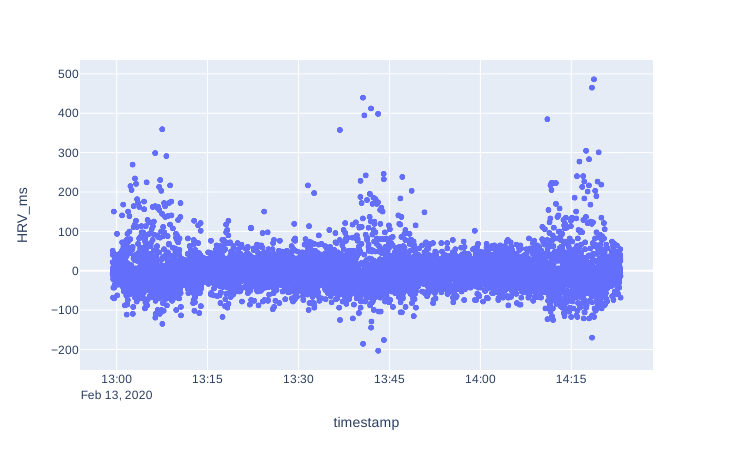

In [90]:
# most of these outliers were checked and seemed valid :)
df_rr = pd.read_parquet(
    list(Path(DATA_PATH + f"/{EDA_PATH}/23").rglob('rr*.parquet'))[0])
import plotly.express as px
px.scatter(df_rr, x='timestamp', y='HRV_ms')

In [34]:
pd.DataFrame(physio_data_block).to_parquet('user_data_per_block.parquet')

block
baseline    AxesSubplot(0.125,0.125;0.775x0.755)
control     AxesSubplot(0.125,0.125;0.775x0.755)
stress      AxesSubplot(0.125,0.125;0.775x0.755)
Name: HR, dtype: object

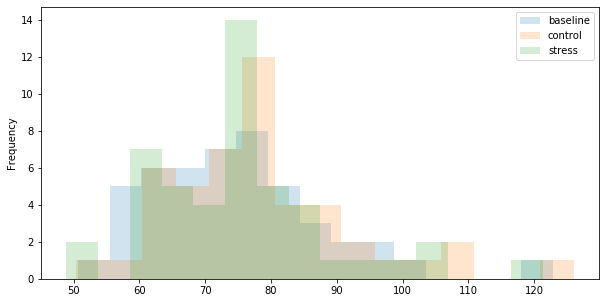

In [35]:
df_physio.groupby('block')['HR'].plot.hist(legend=True, bins=15, figsize=(10, 5),
                                           alpha=0.2)

block
baseline    AxesSubplot(0.125,0.125;0.775x0.755)
control     AxesSubplot(0.125,0.125;0.775x0.755)
stress      AxesSubplot(0.125,0.125;0.775x0.755)
Name: HRV, dtype: object

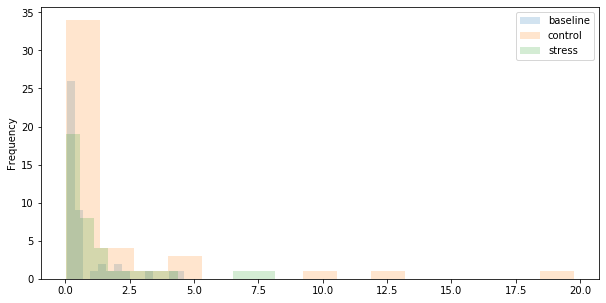

In [36]:
df_physio.groupby('block')['HRV'].plot.hist(legend=True, bins=15, figsize=(10, 5),
                                           alpha=0.2)

#### Delete the following files because they suck (see excel files)

```txt
PPT1: 1 3
PPT2: ALL
PPT3: 0 8
PPT5: 8
PPT6: 7
PPT8: 8
PPT9: 3
PPT17: 6
PPT24: ALL
PPT25: ALL
PPT29: 2 4 8
PPT31: 2
PPT35: 0 3 5 6 7
PPT36: 8
PPT45: ALL
PPT48: 5
PPT53: 0 / ALL (Dyslexie)
PPT60: 0
PPT61: 7
PPT62: ALL
PPT71: ALL
PPT72: ALL
PPT73: ALL
PPT74: ALL
PPT82: ALL
```

In [25]:
data = data[
    ~np.logical_and(
        data["participantNum"] == 1,
        np.logical_or(data["fileNum"] == 1, data["fileNum"] == 3),
    )
]  # PPT1

data = data[data["participantNum"] != 2]  # PPT2

data = data[
    ~np.logical_and(
        data["participantNum"] == 3,
        np.logical_or(data["fileNum"] == 0, data["fileNum"] == 8),
    )
]  # PPT3

data = data[~np.logical_and(data["participantNum"] == 5, data["fileNum"] == 8)]  # PPT5
data = data[~np.logical_and(data["participantNum"] == 6, data["fileNum"] == 7)]  # PPT6
data = data[~np.logical_and(data["participantNum"] == 8, data["fileNum"] == 8)]  # PPT8
data = data[~np.logical_and(data["participantNum"] == 9, data["fileNum"] == 3)]  # PPT9
data = data[
    ~np.logical_and(data["participantNum"] == 17, data["fileNum"] == 6)
]  # PPT17
data = data[data["participantNum"] != 24]  # PPT24
data = data[data["participantNum"] != 25]  # PPT25
data = data[
    ~np.logical_and(
        data["participantNum"] == 29,
        np.logical_or.reduce(
            (data["fileNum"] == 2, data["fileNum"] == 4, data["fileNum"] == 8)
        ),
    )
]
data = data[
    ~np.logical_and(data["participantNum"] == 31, data["fileNum"] == 2)
]  # PPT31
data = data[
    ~np.logical_and(
        data["participantNum"] == 35,
        np.logical_or.reduce(
            (
                data["fileNum"] == 0,
                data["fileNum"] == 3,
                data["fileNum"] == 5,
                data["fileNum"] == 6,
                data["fileNum"] == 7,
            )
        ),
    )
]  # PPT35
data = data[
    ~np.logical_and(data["participantNum"] == 36, data["fileNum"] == 8)
]  # PPT36
data = data[data["participantNum"] != 45]  # PPT45
data = data[
    ~np.logical_and(data["participantNum"] == 48, data["fileNum"] == 5)
]  # PPT48
data = data[data["participantNum"] != 53]  # PPT53
data = data[
    ~np.logical_and(data["participantNum"] == 60, data["fileNum"] == 0)
]  # PPT60
data = data[
    ~np.logical_and(data["participantNum"] == 61, data["fileNum"] == 7)
]  # PPT61
data = data[data["participantNum"] != 62]  # PPT62
# data = data[data['participantNum'] != 68] # PPT68 #### Something wrong with physiological data?
data = data[data["participantNum"] != 71]  # PPT71
data = data[data["participantNum"] != 72]  # PPT72
data = data[data["participantNum"] != 73]  # PPT73
data = data[data["participantNum"] != 74]  # PPT74
# data = data[data['participantNum'] != 79] # PPT79 #### Something wrong with physiological data?
data = data[data["participantNum"] != 82]  # PPT82

# data.to_parquet(FEATURES_PATH + "dataComplete.parquet", engine='fastparquet')  # Write CSV

## Visualization

In [37]:
import plotly.graph_objects as go

In [39]:
sub_block_state_mapping_dict = {
    1: "baseline",
    2: "controle_1",
    3: "controle_2",
    4: "controle_3",
    #     5: "DUNNO",
    6: "stress_1",
    7: "stress_2",
    8: "stress_3",
}

block_state_mapping_dict = {
    1: "baseline",
    2: "controle",
    3: "controle",
    4: "controle",
    #     5: "DUNNO",
    6: "stress",
    7: "stress",
    8: "stress",
}

state_str
baseline      AxesSubplot(0.125,0.125;0.775x0.755)
controle_1    AxesSubplot(0.125,0.125;0.775x0.755)
controle_2    AxesSubplot(0.125,0.125;0.775x0.755)
controle_3    AxesSubplot(0.125,0.125;0.775x0.755)
stress_1      AxesSubplot(0.125,0.125;0.775x0.755)
stress_2      AxesSubplot(0.125,0.125;0.775x0.755)
stress_3      AxesSubplot(0.125,0.125;0.775x0.755)
Name: HR, dtype: object

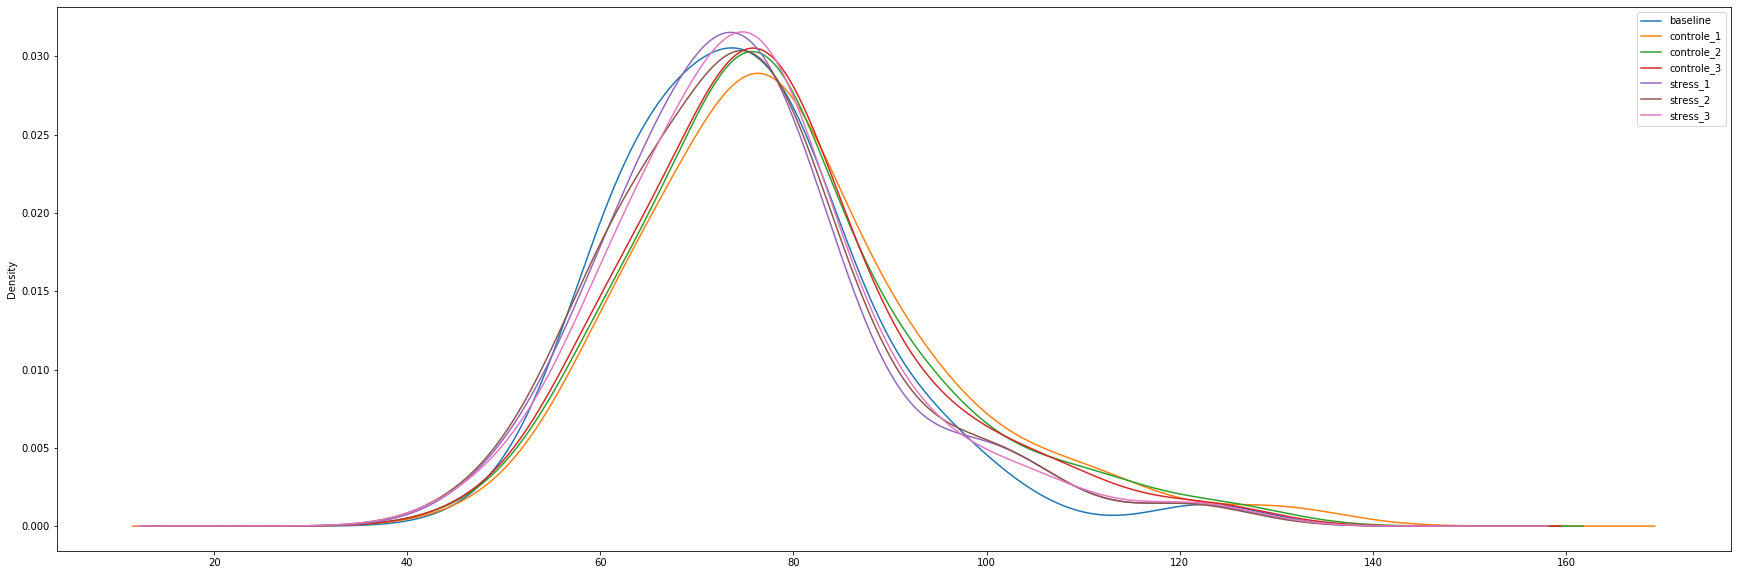

In [53]:
physio_mask = data.SCR_RATE.notna()
data_valid = data[physio_mask].copy()
data_valid["state_str"] = data_valid.fileNum.map(
    # todo -> change this to block_state_mapping or sub_block_state_mapping
    lambda x: sub_block_state_mapping_dict.get(x, "DUNNO")
)

# for c in ['HRV', 'SCR_RATE', 'EDA']:
data_valid.groupby("state_str")["HR"].plot.kde(figsize=(30, 10), legend=True)

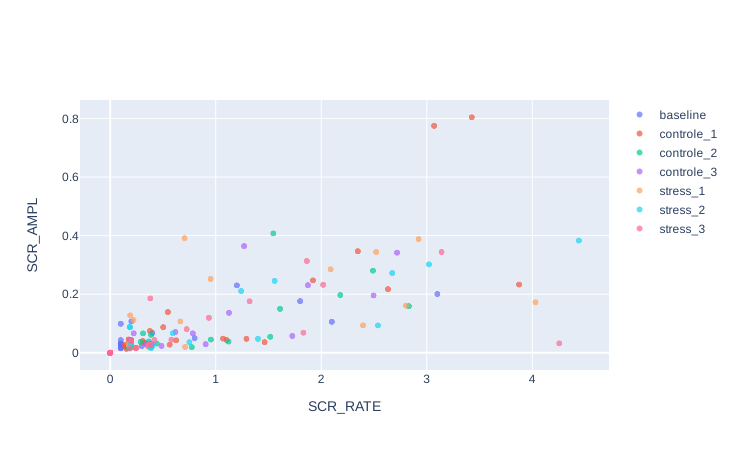

In [54]:
physio_mask = data.SCR_RATE.notna()
data_valid = data[physio_mask].copy()
data_valid["state_str"] = data_valid.fileNum.map(
    # todo -> change this to block_state_mapping or sub_block_state_mapping
    lambda x: sub_block_state_mapping_dict.get(x, "DUNNO")
)

x_col = "SCR_RATE"
y_col = "SCR_AMPL"

fig = go.Figure()
for state_str in data_valid.state_str.unique():
    data_valid_state = data_valid[data_valid.state_str == state_str]
    fig.add_trace(
        go.Scattergl(
            x=data_valid_state[x_col],
            y=data_valid_state[y_col],
            mode="markers",
            marker_opacity=0.7,
            name=state_str,
            hovertext='participant: ' + data_valid_state['participantNum'].astype('str')
        )
    )
fig.update_xaxes(title=x_col)
fig.update_yaxes(title=y_col)

# Visualize some stuff

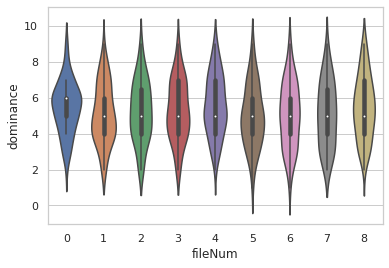

In [12]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# ax = sns.violinplot(x="fileNum", y="F0semitoneFrom27.5Hz_sma3nz_amean@NUMERIC", data=data)
# ax = sns.violinplot(x="fileNum", y="arousal", data=data)
# ax = sns.violinplot(x="fileNum", y="valence", data=data)
ax = sns.violinplot(x="fileNum", y="dominance", data=data)